# Preprocesamiento de los datos


In [85]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Dataset de portafolio

In [86]:
df = pd.read_csv('Dataset-portafolio.csv')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                41 non-null     object
 1   name              41 non-null     object
 2   num_tokens        41 non-null     int64 
 3   token_ganadores   41 non-null     int64 
 4   token_perdedores  41 non-null     int64 
 5   ranking           41 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.0+ KB


In [88]:
df.head()

,id,name,num_tokens,token_ganadores,token_perdedores,ranking
0,655c563a19d020516fba113a,eGirl Capital Portfolio,12,7,3,7
1,605e2a4ed41eae1066535f72,DeFiance Capital Portfolio,15,12,2,10
2,605e2ec9d41eae1066535f82,Paradigm Portfolio,17,14,2,17
3,605e2a78d41eae1066535f73,Coinfund Portfolio,15,13,2,26
4,604f2775ebccdd50cd175fdb,Polychain Capital Portfolio,31,27,2,28


In [89]:
#Verificar si hay datos faltantes
print(df.isnull().sum())

id                  0
name                0
num_tokens          0
token_ganadores     0
token_perdedores    0
ranking             0
dtype: int64


In [90]:
# Verificar si hay filas duplicadas
duplicates = df.duplicated()
print("Número de filas duplicadas:", duplicates.sum())

# Mostrar las filas duplicadas
if duplicates.any():
    print("Filas duplicadas:")
    print(df[duplicates])
else:
    print("No se encontraron filas duplicadas.")

# Eliminar filas duplicadas (si es necesario)
df_cleaned = df.drop_duplicates()

Número de filas duplicadas: 0
No se encontraron filas duplicadas.


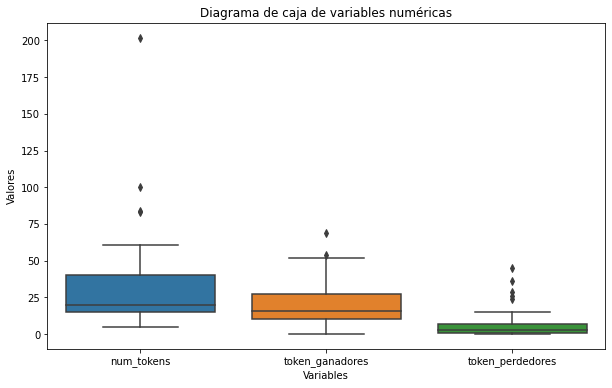

Valores atípicos:
num_tokens: [100, 202, 84, 83]
token_ganadores: [69, 54]
token_perdedores: [29, 45, 24, 36, 26]


In [91]:
# Visualización de diagramas de caja para variables numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['num_tokens', 'token_ganadores', 'token_perdedores']])
plt.title('Diagrama de caja de variables numéricas')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()

# Estadísticas descriptivas para identificar valores atípicos
outliers = {}
for col in ['num_tokens', 'token_ganadores', 'token_perdedores']:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col].tolist()

print("Valores atípicos:")
for col, vals in outliers.items():
    if len(vals) > 0:
        print(f"{col}: {vals}")

En este caso en específico dejaremos las filas con valores atípicos por la cantidad de datos que contamos. Además, estos podrian ser útiles para el análisis posterior

#### Análisis de los datos

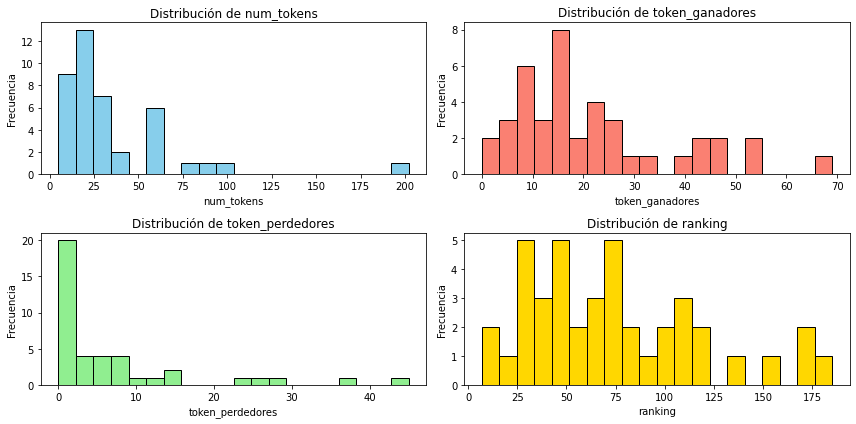

In [92]:
# Histogramas para variables numéricas
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df_cleaned['num_tokens'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de num_tokens')
plt.xlabel('num_tokens')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
plt.hist(df_cleaned['token_ganadores'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de token_ganadores')
plt.xlabel('token_ganadores')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
plt.hist(df_cleaned['token_perdedores'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de token_perdedores')
plt.xlabel('token_perdedores')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
plt.hist(df_cleaned['ranking'], bins=20, color='gold', edgecolor='black')
plt.title('Distribución de ranking')
plt.xlabel('ranking')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Varianza explicada por cada componente principal:
[0.71507605 0.18917684 0.07343666 0.02231045]


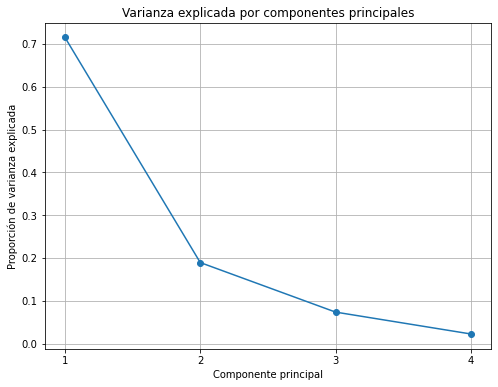

In [93]:
# Escalar las variables numéricas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[['num_tokens', 'token_ganadores', 'token_perdedores', 'ranking']])

# Ajustar el modelo PCA
pca = PCA()
pca.fit(scaled_data)

# Visualizar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)

# Visualizar los componentes principales
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Varianza explicada por componentes principales')
plt.xlabel('Componente principal')
plt.ylabel('Proporción de varianza explicada')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

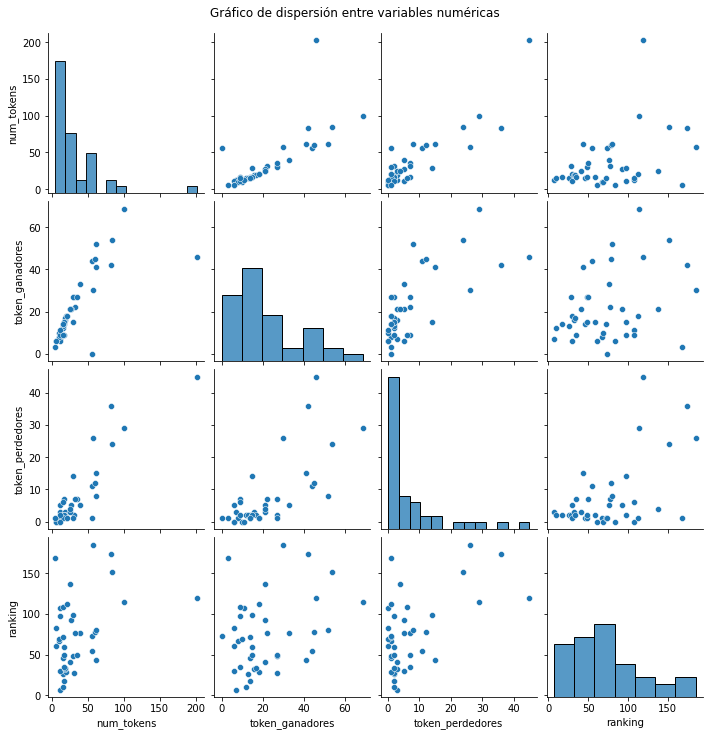

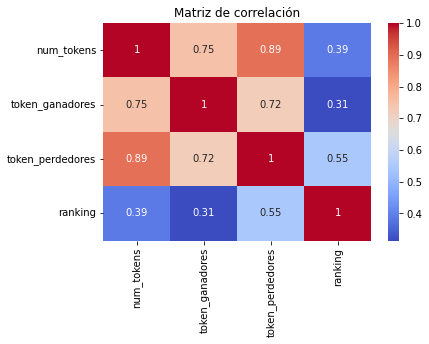

In [94]:
# Gráfico de dispersión entre dos variables numéricas
sns.pairplot(df_cleaned[['num_tokens', 'token_ganadores', 'token_perdedores', 'ranking']])
plt.suptitle('Gráfico de dispersión entre variables numéricas', y=1.02)
plt.show()

# Matriz de correlación
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [95]:
# Matriz de correlación en formato de texto
correlation_matrix_text = df_cleaned.corr().to_string()
print("Matriz de correlación:")
print(correlation_matrix_text)

Matriz de correlación:
                  num_tokens  token_ganadores  token_perdedores   ranking
num_tokens          1.000000         0.748783          0.891502  0.388030
token_ganadores     0.748783         1.000000          0.720754  0.314514
token_perdedores    0.891502         0.720754          1.000000  0.547425
ranking             0.388030         0.314514          0.547425  1.000000


#### Dataset de portafolio_detallado

In [96]:
df_d = pd.read_csv('Dataset-portafolio-detallado.csv')

In [97]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          19735 non-null  object
 1   portfolio     19735 non-null  object
 2   nombre_token  19735 non-null  object
 3   symbol_token  19735 non-null  object
 4   IA            19735 non-null  int64 
 5   Gaming        19735 non-null  int64 
 6   RWA           19735 non-null  int64 
 7   Meme          19735 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.2+ MB


In [98]:
df_d.head()

,date,portfolio,nombre_token,symbol_token,IA,Gaming,RWA,Meme
0,2024-03-28,poolz-finance-portfolio,Gains,GAINS,0,0,0,0
1,2024-03-28,pantera-capital-portfolio,Compound,COMP,0,0,0,0
2,2024-03-28,pantera-capital-portfolio,FTX Token,FTT,0,0,0,0
3,2024-03-28,pantera-capital-portfolio,0x Protocol,ZRX,0,0,0,0
4,2024-03-28,pantera-capital-portfolio,Oasis Network,ROSE,1,0,0,0


In [99]:
df_d[['IA', 'Gaming', 'RWA', 'Meme']] = df_d[['IA', 'Gaming', 'RWA', 'Meme']].astype(bool)

In [100]:
df_d.head()

,date,portfolio,nombre_token,symbol_token,IA,Gaming,RWA,Meme
0,2024-03-28,poolz-finance-portfolio,Gains,GAINS,False,False,False,False
1,2024-03-28,pantera-capital-portfolio,Compound,COMP,False,False,False,False
2,2024-03-28,pantera-capital-portfolio,FTX Token,FTT,False,False,False,False
3,2024-03-28,pantera-capital-portfolio,0x Protocol,ZRX,False,False,False,False
4,2024-03-28,pantera-capital-portfolio,Oasis Network,ROSE,True,False,False,False


In [101]:
# Verificar valores nulos
print(df_d.isnull().sum())

date            0
portfolio       0
nombre_token    0
symbol_token    0
IA              0
Gaming          0
RWA             0
Meme            0
dtype: int64


In [102]:
# Verificar datos duplicados
duplicates = df_d[df_d.duplicated()]
print("Número de filas duplicadas:", duplicates.shape[0])

Número de filas duplicadas: 0


#### Análisis de los datos

              date           portfolio   nombre_token symbol_token     IA  \
count        19735               19735          19735        19735  19735   
unique          33                  43            319          318      2   
top     2024-04-07  dwf-labs-portfolio  Oasis Network         ROSE  False   
freq           603                3295            363          363  17123   

       Gaming    RWA   Meme  
count   19735  19735  19735  
unique      2      2      2  
top     False  False  False  
freq    16418  18446  19537  


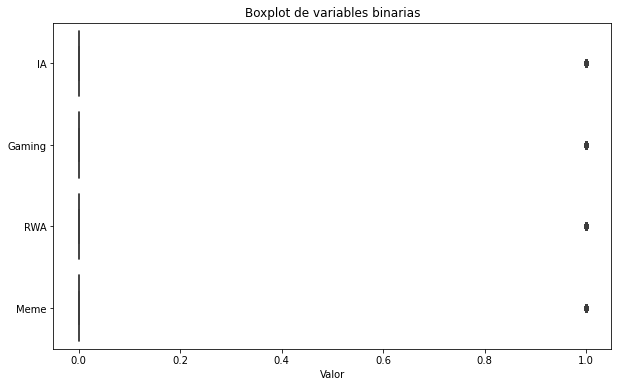

In [103]:
# Estadísticas descriptivas para variables numéricas
print(df_d.describe())

# Visualización de boxplots para variables numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_d[['IA', 'Gaming', 'RWA', 'Meme']], orient="h")
plt.title('Boxplot de variables binarias')
plt.xlabel('Valor')
plt.show()

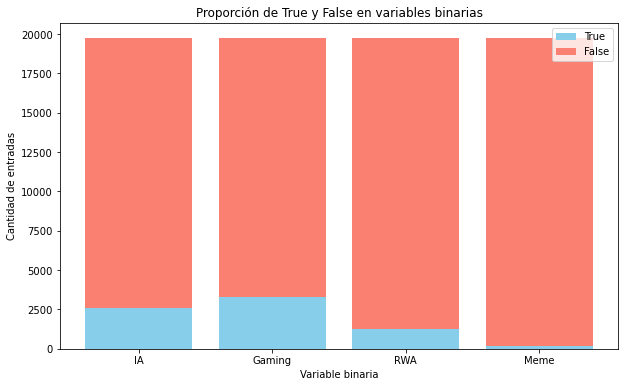

In [104]:
# Calcular la proporción de True y False en cada variable binaria
true_counts = df_d[['IA', 'Gaming', 'RWA', 'Meme']].sum()
false_counts = len(df_d) - true_counts

# Crear un gráfico de barras para mostrar la proporción de True y False
plt.figure(figsize=(10, 6))
plt.bar(true_counts.index, true_counts, color='skyblue', label='True')
plt.bar(false_counts.index, false_counts, color='salmon', label='False', bottom=true_counts)
plt.title('Proporción de True y False en variables binarias')
plt.xlabel('Variable binaria')
plt.ylabel('Cantidad de entradas')
plt.legend()
plt.show()

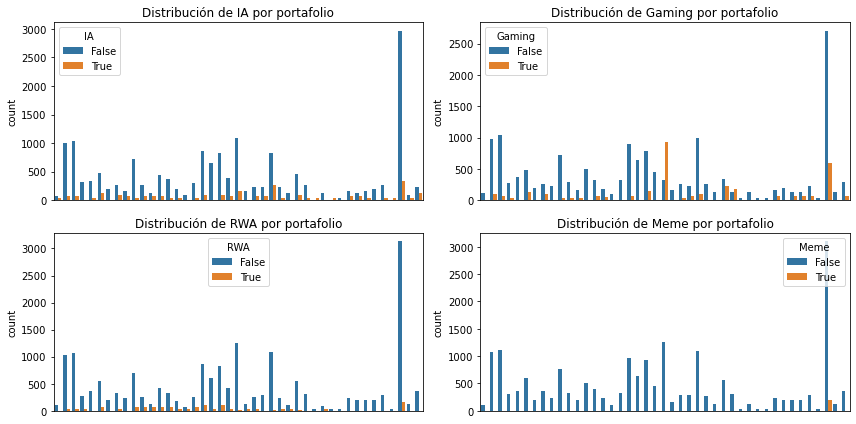

In [105]:
# Comparación de grupos para variables binarias
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='portfolio', hue='IA', data=df_d)
plt.title('Distribución de IA por portafolio')
plt.xlabel('')
plt.xticks([], [])

plt.subplot(2, 2, 2)
sns.countplot(x='portfolio', hue='Gaming', data=df_d)
plt.title('Distribución de Gaming por portafolio')
plt.xlabel('')
plt.xticks([], [])

plt.subplot(2, 2, 3)
sns.countplot(x='portfolio', hue='RWA', data=df_d)
plt.title('Distribución de RWA por portafolio')
plt.xlabel('')
plt.xticks([], [])

plt.subplot(2, 2, 4)
sns.countplot(x='portfolio', hue='Meme', data=df_d)
plt.title('Distribución de Meme por portafolio')
plt.xlabel('')
plt.xticks([], [])

plt.tight_layout()
plt.show()

In [106]:
# Convertir los nombres en la columna 'name' del primer DataFrame a minúsculas y reemplazar los espacios con guiones
# Para que coincida con el dataset detallado
df['name'] = df['name'].str.lower().str.replace(' ', '-')

# Mostrar el DataFrame modificado
print(df)

                          id                             name  num_tokens  \
0   655c563a19d020516fba113a          egirl-capital-portfolio          12   
1   605e2a4ed41eae1066535f72       defiance-capital-portfolio          15   
2   605e2ec9d41eae1066535f82               paradigm-portfolio          17   
3   605e2a78d41eae1066535f73               coinfund-portfolio          15   
4   604f2775ebccdd50cd175fdb      polychain-capital-portfolio          31   
5   605e2967d41eae1066535f70     blockchain-capital-portfolio          20   
6   640c168c41d61948cb493e13        circle-ventures-portfolio          11   
7   605e2acf6507f27280c3897d      dragonfly-capital-portfolio          19   
8   605e2b2c6507f27280c3897e        fabric-ventures-portfolio          19   
9   60cabf685ecd03675c87833a        petrock-capital-portfolio          17   
10  605e2ce9d41eae1066535f7c                   a16z-portfolio          25   
11  604f2772ebccdd50cd175fd9      coinbase-ventures-portfolio          61   

In [107]:
# Copiar el DataFrame para evitar modificar el original
df_d_modified = df_d.copy()

# Crear la columna 'category' basada en los valores True de las últimas cuatro columnas
def get_categories(row):
    categories = [column for column, value in row[4:].items() if value]
    return ', '.join(categories) if categories else None

df_d_modified['category'] = df_d_modified.apply(get_categories, axis=1)

# Mostrar el DataFrame modificado
df_d_modified.head()

,date,portfolio,nombre_token,symbol_token,IA,Gaming,RWA,Meme,category
0,2024-03-28,poolz-finance-portfolio,Gains,GAINS,False,False,False,False,None
1,2024-03-28,pantera-capital-portfolio,Compound,COMP,False,False,False,False,None
2,2024-03-28,pantera-capital-portfolio,FTX Token,FTT,False,False,False,False,None
3,2024-03-28,pantera-capital-portfolio,0x Protocol,ZRX,False,False,False,False,None
4,2024-03-28,pantera-capital-portfolio,Oasis Network,ROSE,True,False,False,False,IA


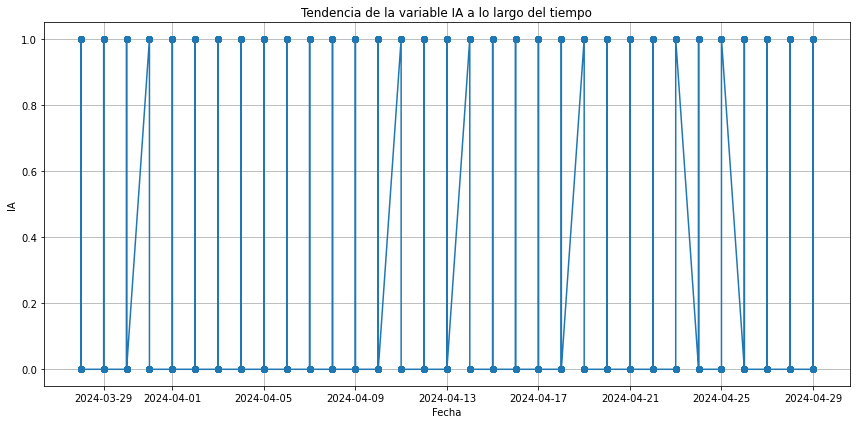

In [108]:
# Convertir la columna de fecha a tipo datetime
df_d_modified['date'] = pd.to_datetime(df_d_modified['date'])

# Graficar las tendencias de una variable numérica (por ejemplo, 'IA') a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_d_modified['date'], df_d_modified['IA'], marker='o', linestyle='-')
plt.title('Tendencia de la variable IA a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('IA')
plt.grid(True)
plt.tight_layout()
plt.show()

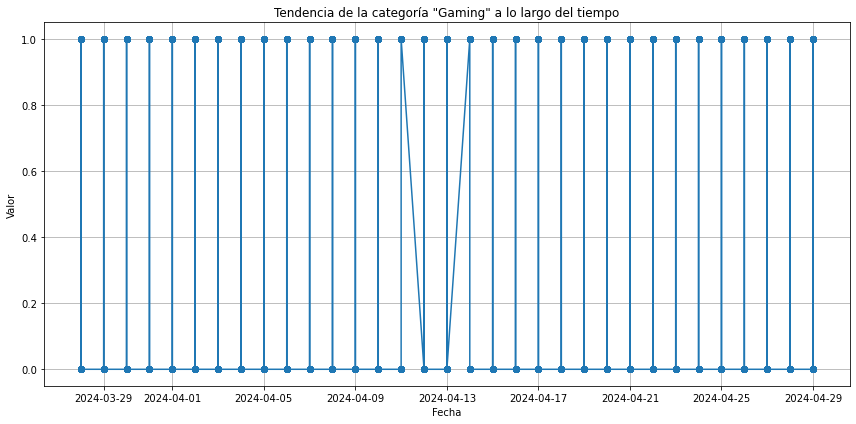

In [109]:
# Graficar la tendencia de la categoría 'Gaming' a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_d_modified['date'], df_d_modified['Gaming'], marker='o', linestyle='-')
plt.title('Tendencia de la categoría "Gaming" a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.tight_layout()
plt.show()

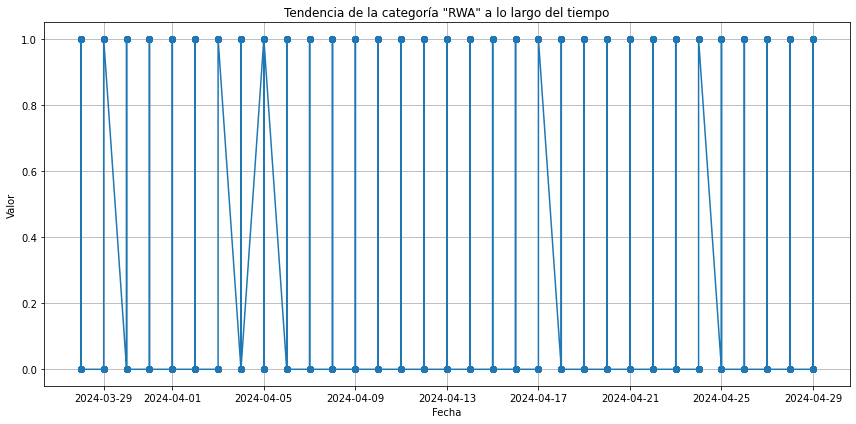

In [110]:
# Graficar la tendencia de la categoría 'RWA' a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_d_modified['date'], df_d_modified['RWA'], marker='o', linestyle='-')
plt.title('Tendencia de la categoría "RWA" a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.tight_layout()
plt.show()

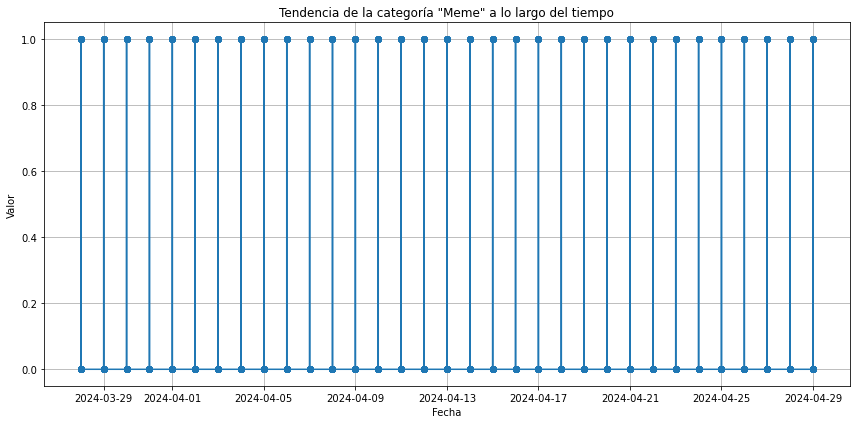

In [111]:
# Graficar la tendencia de la categoría 'Meme' a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_d_modified['date'], df_d_modified['Meme'], marker='o', linestyle='-')
plt.title('Tendencia de la categoría "Meme" a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.tight_layout()
plt.show()

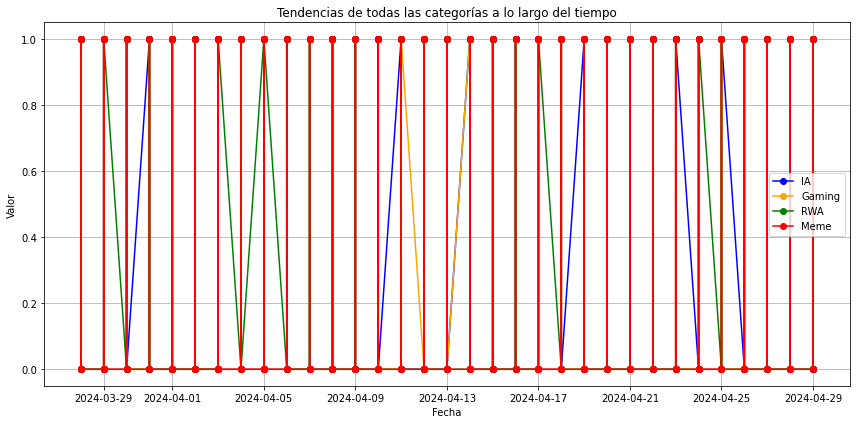

In [112]:
# Graficar las tendencias de todas las categorías a lo largo del tiempo
plt.figure(figsize=(12, 6))

# Establecer colores para las líneas
colors = ['blue', 'orange', 'green', 'red']

# Iterar sobre cada categoría para graficar
for i, category in enumerate(['IA', 'Gaming', 'RWA', 'Meme']):
    plt.plot(df_d_modified['date'], df_d_modified[category], marker='o', linestyle='-', color=colors[i], label=category)

plt.title('Tendencias de todas las categorías a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [129]:
# Convertir la columna 'date' a tipo datetime si aún no está en ese formato
df_d_modified['date'] = pd.to_datetime(df_d_modified['date'])

# Ordenar los datos por 'portfolio', 'nombre_token' y 'date'
df_d_modified = df_d_modified.sort_values(by=['portfolio', 'nombre_token', 'date'])

# Agrupar los datos por 'portfolio' y 'nombre_token'
grouped = df_d_modified.groupby(['portfolio', 'nombre_token'])

# Función para calcular la duración de retención en número de días y obtener la categoría del token
def calcular_duracion_retencion_y_categoria(group):
    # Verificar si hay al menos una fecha de adquisición y una fecha de eliminación en el grupo
    if len(group) >= 2:
        # Calcular la fecha de adquisición como la primera fecha en la que la criptomoneda aparece en el portfolio
        fecha_adquisicion = group['date'].min()
        # Calcular la fecha de eliminación como la última fecha en la que la criptomoneda desaparece del portfolio
        fecha_eliminacion = group['date'].max()
        # Calcular la duración de retención como la diferencia entre la fecha de eliminación y la fecha de adquisición,
        # y convertirla a número de días
        duracion_retencion = (fecha_eliminacion - fecha_adquisicion).days
        # Obtener la categoría del token
        categoria = group['category'].iloc[0]
        # Retornar la duración de retención en número de días y la categoría del token
        return pd.Series({'duracion_retencion': duracion_retencion, 'category': categoria})

# Aplicar la función a cada grupo y agregar los resultados a un nuevo DataFrame
df_duracion_retencion_categoria = grouped.apply(calcular_duracion_retencion_y_categoria).reset_index()

# Eliminar filas con duración de retención igual a NaN (indicando que no hay fecha de adquisición o eliminación)
df_duracion_retencion_categoria = df_duracion_retencion_categoria.dropna(subset=['duracion_retencion'])

# Visualizar las primeras filas del DataFrame resultante
df_duracion_retencion_categoria

,portfolio,nombre_token,duracion_retencion,category
0,1confirmation-portfolio,Augur,32.0,NaN
1,1confirmation-portfolio,Basic Attention Token,32.0,NaN
2,1confirmation-portfolio,Maker,32.0,RWA
3,1confirmation-portfolio,Stride,32.0,NaN
4,a16z-portfolio,Compound,32.0,NaN
...,...,...,...,...
618,vbc-ventures-portfolio,Rangers Protocol Gas,32.0,NaN
619,vbc-ventures-portfolio,Red Kite,32.0,NaN
620,vbc-ventures-portfolio,SENATE,32.0,"IA, Gaming"
621,vbc-ventures-portfolio,WOO,32.0,NaN


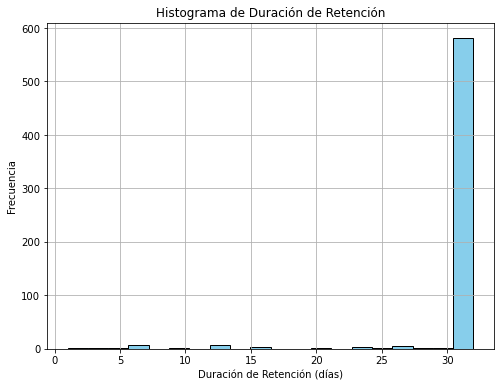

In [114]:
# Crear histograma de duración de retención
plt.figure(figsize=(8, 6))
plt.hist(df_duracion_retencion_categoria['duracion_retencion'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Duración de Retención')
plt.xlabel('Duración de Retención (días)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

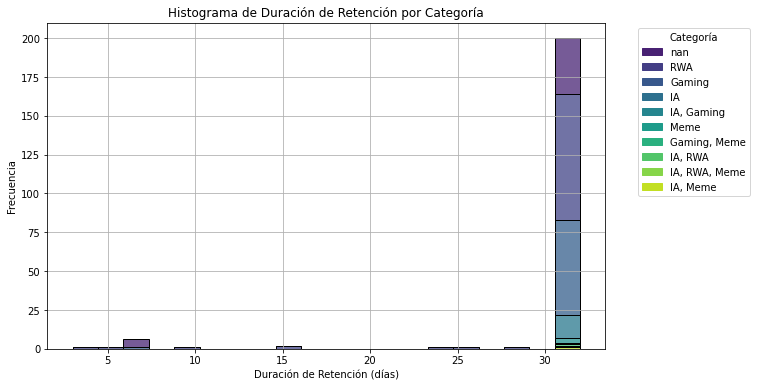

In [115]:
# Crear histograma de duración de retención por categoría
plt.figure(figsize=(10, 6))
sns.histplot(df_duracion_retencion_categoria, x='duracion_retencion', hue='category', multiple='stack', bins=20, palette='viridis')
plt.title('Histograma de Duración de Retención por Categoría')
plt.xlabel('Duración de Retención (días)')
plt.ylabel('Frecuencia')
plt.grid(True)

# Agregar leyenda manualmente fuera del gráfico
categories = df_duracion_retencion_categoria['category'].unique()
legend_labels = [mpatches.Patch(color=sns.color_palette('viridis', len(categories))[i], label=cat) for i, cat in enumerate(categories)]
plt.legend(handles=legend_labels, title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1800x576 with 0 Axes>

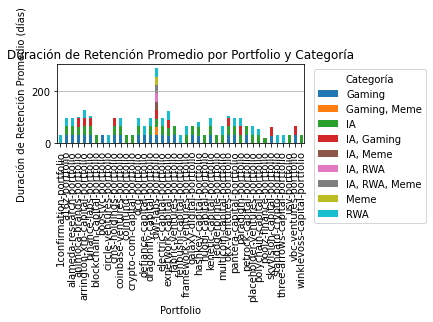

In [130]:
# Calcular la duración de retención promedio por portfolio y categoría
duracion_retencion_promedio = df_duracion_retencion_categoria.groupby(['portfolio', 'category'])['duracion_retencion'].mean().unstack()

# Crear gráfico de barras apiladas de la duración de retención por portfolio y categoría
plt.figure(figsize=(25, 8))  # Tamaño ajustado
ax = duracion_retencion_promedio.plot(kind='bar', stacked=True, cmap='tab10')
plt.title('Duración de Retención Promedio por Portfolio y Categoría')
plt.xlabel('Portfolio')
plt.ylabel('Duración de Retención Promedio (días)')

# Cambiar la orientación de los nombres de los portafolios en el eje x a vertical
plt.xticks(rotation=90)  # Rotación de 90 grados

# Colocar la leyenda al lado del gráfico
plt.legend(title='Categoría', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


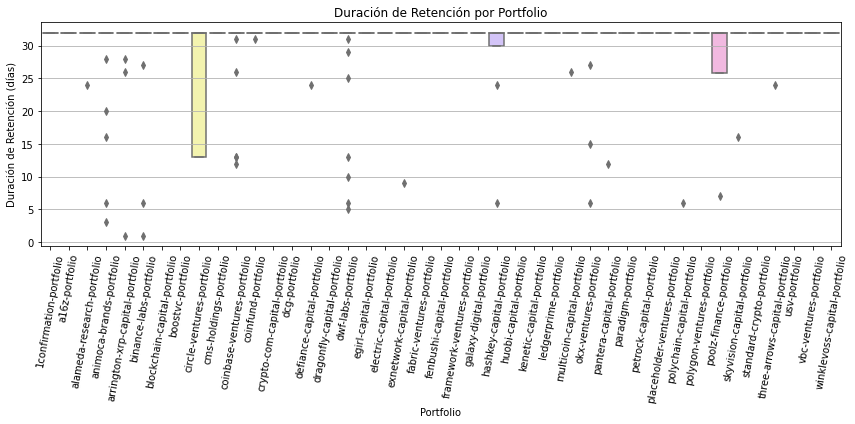

In [117]:
# Crear gráfico de caja de la duración de retención por portfolio
plt.figure(figsize=(12, 6))
sns.boxplot(x='portfolio', y='duracion_retencion', data=df_duracion_retencion_categoria, palette='pastel')
plt.title('Duración de Retención por Portfolio')
plt.xlabel('Portfolio')
plt.ylabel('Duración de Retención (días)')
plt.xticks(rotation=80)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

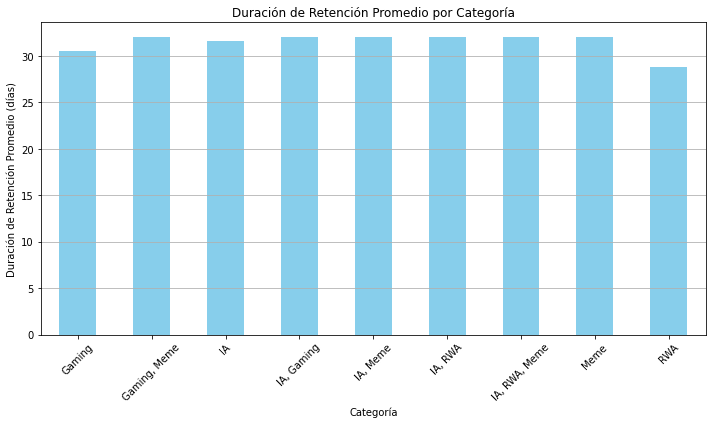

In [118]:
# Calcular la duración de retención promedio por categoría
duracion_retencion_promedio_categoria = df_duracion_retencion_categoria.groupby('category')['duracion_retencion'].mean()

# Crear gráfico de barras de la duración de retención por categoría
plt.figure(figsize=(10, 6))
duracion_retencion_promedio_categoria.plot(kind='bar', color='skyblue')
plt.title('Duración de Retención Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Duración de Retención Promedio (días)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


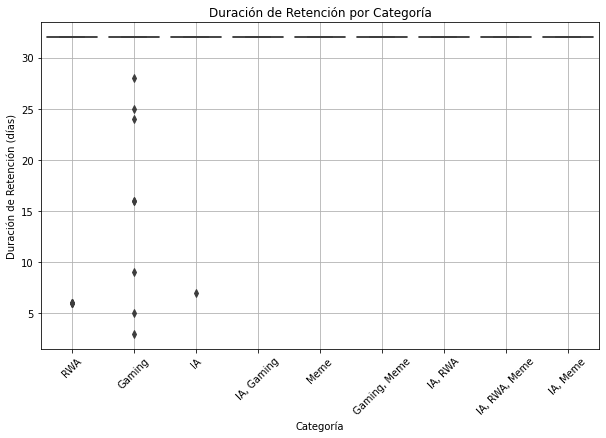

In [119]:
# Crear gráfico de caja de duración de retención por categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='duracion_retencion', data=df_duracion_retencion_categoria)
plt.title('Duración de Retención por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Duración de Retención (días)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

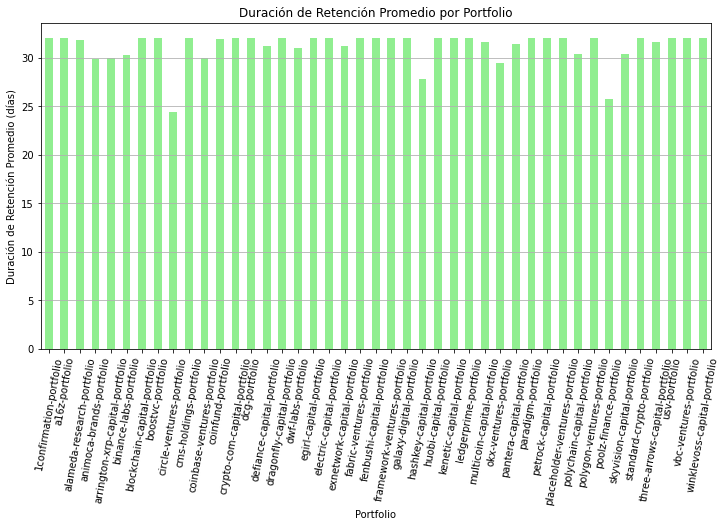

In [120]:
# Calcular duración de retención promedio por portfolio
duracion_retencion_promedio = df_duracion_retencion_categoria.groupby('portfolio')['duracion_retencion'].mean()

# Crear gráfico de barras de duración de retención por portfolio
plt.figure(figsize=(12, 6))
duracion_retencion_promedio.plot(kind='bar', color='lightgreen')
plt.title('Duración de Retención Promedio por Portfolio')
plt.xlabel('Portfolio')
plt.ylabel('Duración de Retención Promedio (días)')
plt.xticks(rotation=80)
plt.grid(axis='y')
plt.show()

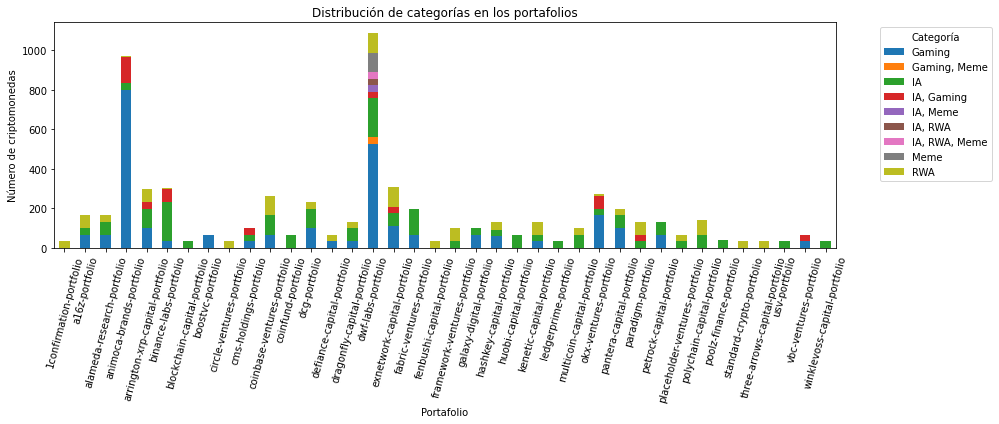

In [121]:
# La columna 'portfolio' en el segundo DataFrame es la que relaciona los datos
# Combinar los dos DataFrames en uno solo basado en la columna 'portfolio'
df_combined = pd.merge(df, df_d_modified, left_on='name', right_on='portfolio')

# Contar el número de criptomonedas en cada categoría para cada portafolio
category_counts = df_combined.groupby(['name', 'category']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
category_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de categorías en los portafolios')
plt.xlabel('Portafolio')
plt.ylabel('Número de criptomonedas')
plt.xticks(rotation=75)
plt.tight_layout()
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

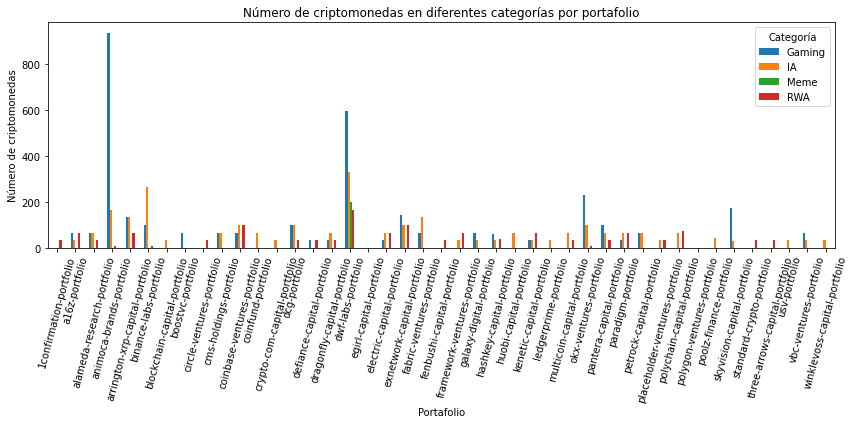

In [122]:
# Pivotar los datos para tener los portafolios en el eje x y las categorías en el eje y
pivot_table = df_d_modified.pivot_table(index='portfolio', values=df_d_modified.columns[4:], aggfunc='sum')

# Crear el gráfico de barras agrupadas
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title('Número de criptomonedas en diferentes categorías por portafolio')
plt.xlabel('Portafolio')
plt.ylabel('Número de criptomonedas')
plt.xticks(rotation=75)
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16724\3967929965.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_category_counts = df_d_modified.iloc[:, 4:].sum()


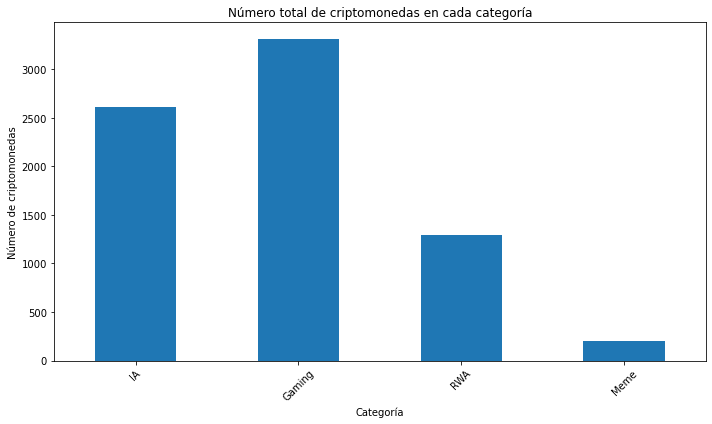

In [123]:
# Calcular el número total de criptomonedas en cada categoría
total_category_counts = df_d_modified.iloc[:, 4:].sum()

# Crear el gráfico de barras
total_category_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Número total de criptomonedas en cada categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de criptomonedas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

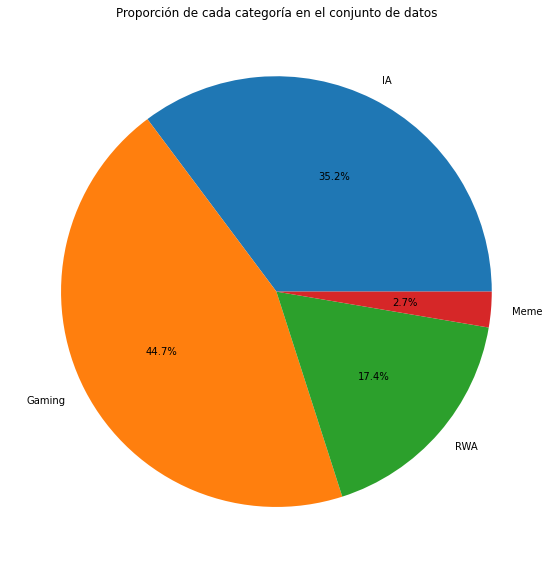

In [124]:
# Crear el gráfico de pastel
plt.figure(facecolor='white')  # Establecer el fondo blanco
total_category_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Proporción de cada categoría en el conjunto de datos')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [125]:
# Guardar los DataFrames limpiados en archivos CSV
df_cleaned.to_csv('dataset-portfolio-clean.csv', index=False)
df_d_modified.to_csv('dataset-portfolio-detallado-clean.csv', index=False)

### Insights y datos a recalcar

* A través de los gráficos de barras apiladas, observamos cómo se distribuyen las diferentes categorías de criptomonedas en cada portfolio. Esto nos permite entender las preferencias de inversión de los gestores de cartera y cómo asignan sus activos en diferentes segmentos del mercado de criptomonedas. 

* El análisis revela que la categoría 'Meme' representa un 2,7% del total de activos en los portafolios analizados, lo que sugiere una presencia limitada pero no ausente de este tipo específico de activo entre los inversores estudiados.

* El análisis sugiere que los portfolios con más tokens tienden a tener un mayor número tanto de tokens ganadores como perdedores, pero la cantidad de tokens no está fuertemente relacionada con el ranking, lo que implica que una mayor diversificación no garantiza un mejor ranking.

* El análisis muestra que la mayoría de las criptomonedas son retenidas por 32 días en los portfolios, lo que sugiere una tendencia generalizada hacia la retención a corto plazo en el mercado de criptomonedas y además resulta curioso que se realicen gran número de estas operaciones en ese plazo exacto.

* Mediante el análisis de la duración de retención por categoría, podríamos identificar si ciertas categorías de criptomonedas tienden a retenerse durante períodos más largos que otras. Esto podría proporcionar información valiosa sobre las preferencias de inversión y la percepción del riesgo en diferentes segmentos del mercado.